In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [4]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
amazon_ratings.shape


(2023070, 4)

In [6]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<AxesSubplot:xlabel='ProductId'>

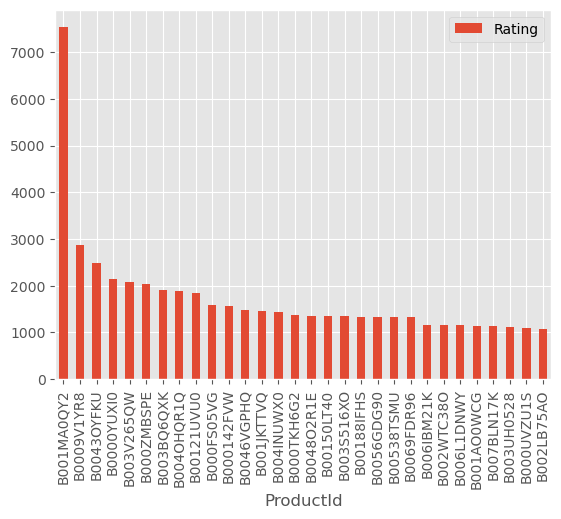

In [8]:
#The above graph gives us the most popular products (arranged in descending order) sold by the business.
most_popular.head(30).plot(kind = "bar")

# Model-based collaborative filtering system

In [9]:
## Subset of Amazon Ratings
amazon_ratings1 = amazon_ratings.head(10000)

In [10]:
#Utility Matrix based on products sold and user reviews
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0

In [11]:
ratings_utility_matrix.shape

(9697, 886)

In [12]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.shape

(886, 9697)

In [14]:
#Unique products in subset of data
X1 = X

# Decomposing the Matrix

In [15]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

# Correlation matrix

In [16]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

# Isolating Product ID # 6117036094 from the Correlation Matrix
Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [17]:
X.index[99]

'6117036094'

# Index # of product ID purchased by customer

In [18]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

# Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [19]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

# Recommending top 10 highly correlated products in sequence

In [20]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['1304139212',
 '1304139220',
 '130414643X',
 '130414674X',
 '1304174778',
 '1304174867',
 '1304174905',
 '1304196046',
 '1304196062']

# Recommendation System - Part III for businesses without any user-item purchase history(based on textual clustering analysis )

In [21]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [28]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [29]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [30]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

# Feature extraction from product descriptions
Converting the text in product description into numerical data for analysis

In [31]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

# Visualizing product clusters in subset of data

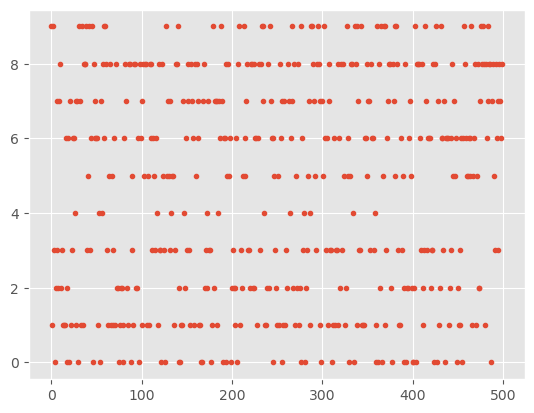

In [32]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [34]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

# Top words in each cluster based on product description

In [35]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 water
 toilet
 tank
 watering
 handle
 flush
 gal
 easy
 bowl
 spray
Cluster 1:
 pole
 base
 canopy
 light
 umbrella
 finish
 cutting
 bronze
 grill
 ft
Cluster 2:
 ft
 use
 metal
 easy
 12
 resistant
 steel
 included
 durable
 provides
Cluster 3:
 collection
 patio
 frame
 dining
 cushions
 wicker
 steel
 outdoor
 chairs
 fabric
Cluster 4:
 post
 ft
 wood
 painted
 proposition
 nbsp
 residents
 california
 65
 natural
Cluster 5:
 helps
 tool
 power
 free
 cycle
 design
 speed
 control
 easy
 snow
Cluster 6:
 air
 cooling
 fan
 water
 power
 light
 insulation
 unit
 control
 000
Cluster 7:
 door
 aluminum
 window
 cut
 easy
 frame
 concrete
 screen
 wood
 home
Cluster 8:
 rug
 outdoor
 tile
 recommended
 indoor
 100
 vary
 ft
 patterns
 slightly
Cluster 9:
 storage
 shelves
 lbs
 shelf
 adjustable
 wall
 easy
 capacity
 unit
 finish


/Users/nirajtiwari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Predicting clusters based on key search words

In [36]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [39]:
#lets take keyword as cutting tool..
show_recommendations("weights")

Cluster 2:
 ft
 use
 metal
 easy
 12
 resistant
 steel
 included
 durable
 provides


In [41]:
show_recommendations("cooling fan")

Cluster 6:
 air
 cooling
 fan
 water
 power
 light
 insulation
 unit
 control
 000


In [42]:
show_recommendations("steel drill")

Cluster 2:
 ft
 use
 metal
 easy
 12
 resistant
 steel
 included
 durable
 provides


# In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word... for .eg."water"

In [43]:
show_recommendations("water")
#Once a cluster is identified based on the user's search words, 
#the recommendation system can display items from the corresponding product clusters 
#based on the product descriptions.

Cluster 0:
 water
 toilet
 tank
 watering
 handle
 flush
 gal
 easy
 bowl
 spray
